# Lab 09 Support Vector Machine

2020.08.30 김채형

In [55]:
# imports and setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('seaborn') # pretty matplotlib plots

In [56]:
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV # Grid Search
from sklearn.svm import SVC # SVM
from mlxtend.plotting import plot_decision_regions # Decision Boundary Plot
from mlxtend.evaluate import confusion_matrix # Confusion Matrix
from mlxtend.plotting import plot_confusion_matrix # Confusion Matrix Plot

## 9.6.1 Support Vector Classifier

**데이터 준비하기**

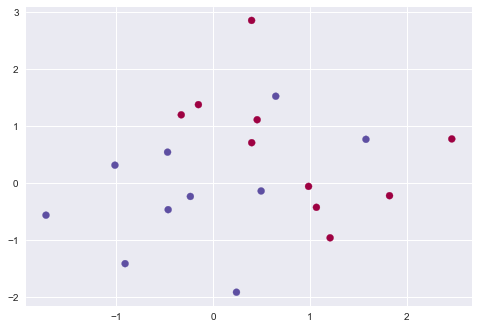

In [57]:
np.random.seed(42)

X = np.random.normal(size=40).reshape(20,2) # normal 분포에서 40개 랜덤 추출 후 20행 2열로 바꿈
y = np.concatenate((np.ones(10, dtype=np.int64)*-1, np.ones(10, dtype=np.int64))) # -1을 10개, 1을 10개 생성 후 합침
X[y==1, :] += 1 # y=1 인 X에 1씩 더함 (target class가 다른 X에 대해서 차이를 주기 위한 것 같음,,)

plt.scatter(X[:, 0], X[:, 1], c=(3-y), cmap='Spectral') # x축 = X의 1열, y축 = X의 2열

**모델링**

In [58]:
"""
SVC(
    kernel = {'linear','poly','rbf','sigmoid','precomputed'}
    C : Regularization parameter
)
"""
svc = SVC(kernel='linear', C = 10) # 모델 선언
svc.fit(X, y) # 모델 fitting

SVC(C=10, kernel='linear')

/Users/kimchaehyeong/.pyenv/versions/anaconda3-5.3.0/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:318: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  **scatter_highlight_kwargs)


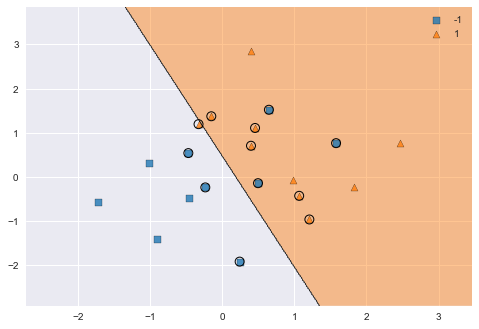

In [59]:
# decision boundary
plot_decision_regions(X, y, clf=svc, X_highlight=svc.support_vectors_)

동그라미 쳐진 것들이 support vectors

In [60]:
# support vectors
pd.DataFrame(svc.support_vectors_, index=svc.support_)

,0,1
0,0.49671,-0.13826
1,0.64769,1.52303
2,-0.23415,-0.23414
3,1.57921,0.76743
4,-0.46947,0.54256
6,0.24196,-1.91328
11,1.06753,-0.42475
12,0.45562,1.11092
13,-0.15099,1.37570
14,0.39936,0.70831


In [61]:
svc2 = SVC(kernel='linear', C=0.1)
svc2.fit(X, y)

SVC(C=0.1, kernel='linear')

/Users/kimchaehyeong/.pyenv/versions/anaconda3-5.3.0/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:318: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  **scatter_highlight_kwargs)


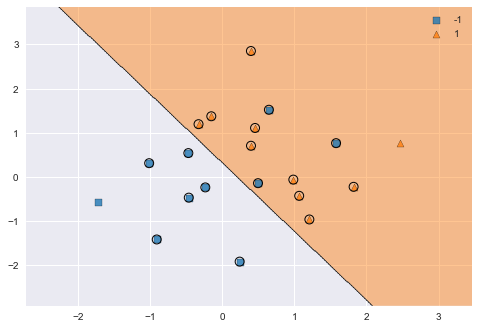

In [62]:
plot_decision_regions(X, y, clf=svc2, X_highlight=svc2.support_vectors_)

In [63]:
# support vectors
pd.DataFrame(svc2.support_vectors_, index=svc2.support_)

,0,1
0,0.49671,-0.13826
1,0.64769,1.52303
2,-0.23415,-0.23414
3,1.57921,0.76743
4,-0.46947,0.54256
...,...,...
15,0.39829,2.85228
16,0.98650,-0.05771
17,1.82254,-0.22084
18,1.20886,-0.95967


**그리드서치**

In [64]:
svc3 = SVC(kernel='linear') # 모델 선언
param_grid = {'C':np.array([0.001, 0.01, 0.1, 1, 5, 10, 100])} # 그리드 생성

In [65]:
# 그리드서치
tune = GridSearchCV(svc3, param_grid, cv=10) 
tune.fit(X, y)

GridSearchCV(cv=10, estimator=SVC(kernel='linear'),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 5.e+00, 1.e+01, 1.e+02])})

In [38]:
# 그리드서치 결과 출력
tune.cv_results_

{'mean_fit_time': array([0.00055087, 0.00041816, 0.00040057, 0.00039504, 0.00041451,
        0.00043344, 0.00072348]),
 'std_fit_time': array([1.23577676e-04, 5.94613690e-05, 1.35850270e-05, 3.29233527e-06,
        1.42936661e-05, 3.47687540e-05, 1.96859847e-04]),
 'mean_score_time': array([0.00045292, 0.00029693, 0.00031095, 0.00029156, 0.00029213,
        0.00029573, 0.00036988]),
 'std_score_time': array([2.08803911e-04, 1.31451473e-05, 5.33889208e-05, 1.76316947e-06,
        1.53423791e-06, 1.04682862e-05, 1.40027484e-04]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 100.0],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1.0},
  {'C': 5.0},
  {'C': 10.0},
  {'C': 100.0}],
 'split0_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'split1_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'split2_test_score': ar

In [39]:
# 그리드서치 결과 최적의 파라미터
tune.best_params_

{'C': 0.001}

**분류 성능 평가**

In [40]:
# 테스트 데이터 준비하기
np.random.seed(42)

X_test = np.random.normal(size=40).reshape(20,2)
y_test = resample(np.concatenate((np.ones(10, dtype=np.int64)*-1, np.ones(10, dtype=np.int64))),
                  replace=True,
                  n_samples=20, 
                  random_state=42)
X_test[y_test == 1, :] += 1

[[ 0.49671415 -0.1382643 ]
 [ 1.64768854  2.52302986]
 [ 0.76584663  0.76586304]
 [ 2.57921282  1.76743473]
 [-0.46947439  0.54256004]
 [-0.46341769 -0.46572975]
 [ 1.24196227 -0.91328024]
 [-0.72491783  0.43771247]
 [-0.01283112  1.31424733]
 [-0.90802408 -1.4123037 ]
 [ 1.46564877 -0.2257763 ]
 [ 0.0675282  -1.42474819]
 [-0.54438272  0.11092259]
 [-0.15099358  1.37569802]
 [-0.60063869 -0.29169375]
 [-0.60170661  1.85227818]
 [-0.01349722 -1.05771093]
 [ 1.82254491 -0.22084365]
 [ 1.2088636  -0.95967012]
 [-0.32818605  1.19686124]]
[-1  1  1  1 -1 -1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1  1  1  1]


In [41]:
y_pred = tune.predict(X_test)

(<Figure size 576x396 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a26db1a20>)

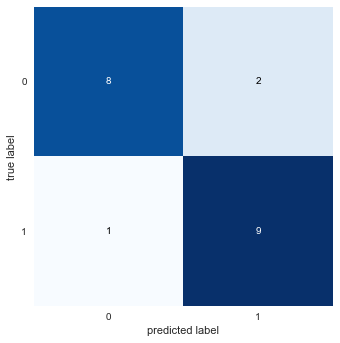

In [42]:


plot_confusion_matrix(confusion_matrix(y_test, y_pred))

In [43]:
svc4 = SVC(kernel='linear', C=0.01)
svc4.fit(X_test, y_test)

SVC(C=0.01, kernel='linear')

In [44]:
y_pred4 = svc4.predict(X_test)

(<Figure size 576x396 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a26e0a198>)

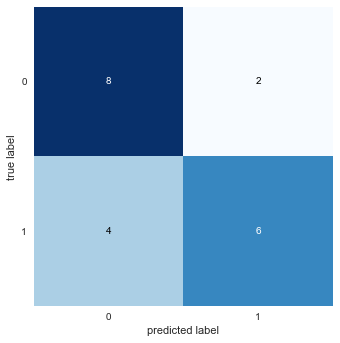

In [45]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred4))

In [46]:
X[y==1, :] += 1.1

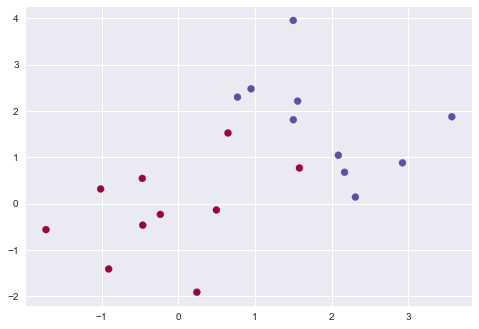

In [47]:
plt.scatter(X[:, 0], X[:, 1], c=(y+5)/2, cmap='Spectral')

In [48]:
svc5 = SVC(kernel='linear', C=1e5)
svc5.fit(X, y)

SVC(C=100000.0, kernel='linear')

/Users/kimchaehyeong/.pyenv/versions/anaconda3-5.3.0/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:318: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  **scatter_highlight_kwargs)


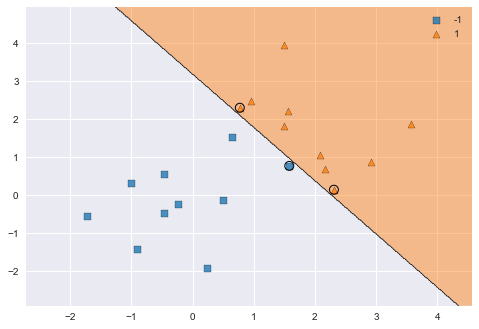

In [49]:
plot_decision_regions(X, y, clf=svc5, X_highlight=svc5.support_vectors_)

/Users/kimchaehyeong/.pyenv/versions/anaconda3-5.3.0/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:318: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  **scatter_highlight_kwargs)


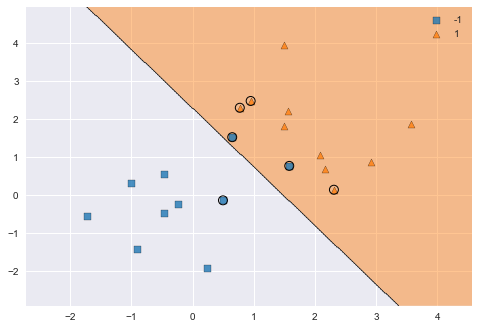

In [50]:
svc6 = SVC(kernel='linear', C=1)
svc6.fit(X, y)

plot_decision_regions(X, y, clf=svc6, X_highlight=svc6.support_vectors_)

## 9.6.2 Support Vector Machine

In [66]:
np.random.seed(42)

X = np.random.normal(size=400).reshape(200,2)
X[0:100, :] += 2
X[100:150, :] -= 2
y = np.concatenate((np.full(150, 1, dtype=np.int64), np.full(50, 2, dtype=np.int64)))

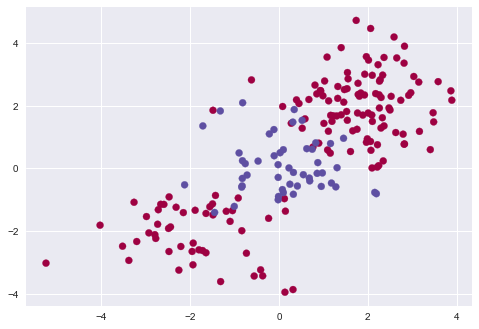

In [67]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Spectral')

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, test_size=0.5, random_state=42)

In [70]:
svm = SVC(kernel='rbf', gamma=1, C=1)
svm.fit(X_train, y_train)

SVC(C=1, gamma=1)

/Users/kimchaehyeong/.pyenv/versions/anaconda3-5.3.0/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:318: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  **scatter_highlight_kwargs)


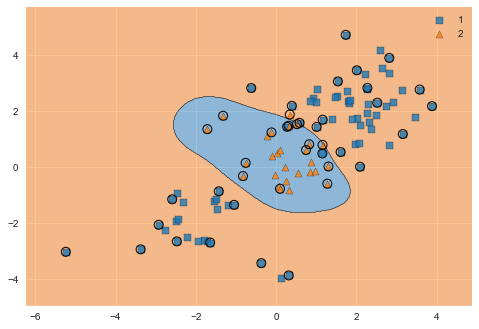

In [71]:
plot_decision_regions(X_train, y_train, clf=svm, X_highlight=svm.support_vectors_)

In [72]:
svm2 = SVC(kernel='rbf', gamma=1, C=1e5)
svm2.fit(X_train, y_train)

SVC(C=100000.0, gamma=1)

/Users/kimchaehyeong/.pyenv/versions/anaconda3-5.3.0/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:318: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  **scatter_highlight_kwargs)


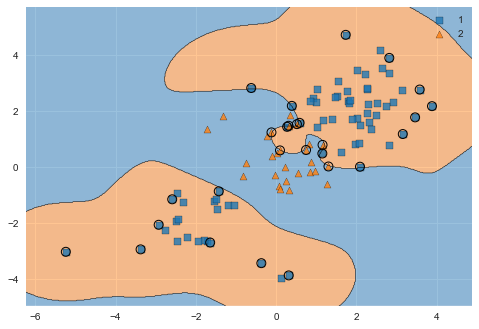

In [75]:
plot_decision_regions(X_train, y_train, clf=svm2, X_highlight=svm2.support_vectors_)

**그리드서치**

In [76]:
svm3 = SVC(kernel='rbf')

c_space = np.array([0.1, 1, 10, 100, 1000])
g_space = np.array([0.5, 1, 2, 3, 4])
param_grid = {'C':c_space, 'gamma':g_space}

In [77]:
tune = GridSearchCV(svm3, param_grid, cv=10)
tune.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'gamma': array([0.5, 1. , 2. , 3. , 4. ])})

In [79]:
tune.cv_results_

{'mean_fit_time': array([0.00076993, 0.00069046, 0.00067573, 0.00061278, 0.00067546,
        0.00048962, 0.00049384, 0.00062671, 0.00067959, 0.00066445,
        0.00045719, 0.00051093, 0.00062835, 0.00070539, 0.0007144 ,
        0.00049133, 0.00060973, 0.00064635, 0.00071251, 0.00070224,
        0.00067742, 0.00057063, 0.00073059, 0.00082262, 0.00079198]),
 'std_fit_time': array([1.60680469e-04, 1.76564532e-04, 1.57615412e-04, 1.67300544e-05,
        1.20179257e-04, 5.20553759e-05, 1.52748180e-05, 3.52138995e-05,
        5.05848941e-05, 1.02350461e-05, 1.58185652e-05, 2.49570847e-05,
        3.92650500e-05, 2.36998621e-05, 2.77565104e-05, 2.35503496e-05,
        1.20469499e-04, 3.97056778e-05, 4.43475541e-05, 2.60717448e-05,
        8.04145293e-05, 6.40498278e-05, 1.52845614e-04, 1.28255149e-04,
        3.85937456e-05]),
 'mean_score_time': array([0.0005666 , 0.00053811, 0.00037057, 0.00032029, 0.0003577 ,
        0.00032506, 0.00031102, 0.00031278, 0.00033019, 0.00031264,
        0.00

In [80]:
tune.best_params_

{'C': 1.0, 'gamma': 0.5}

In [81]:
y_pred = tune.predict(X_test)

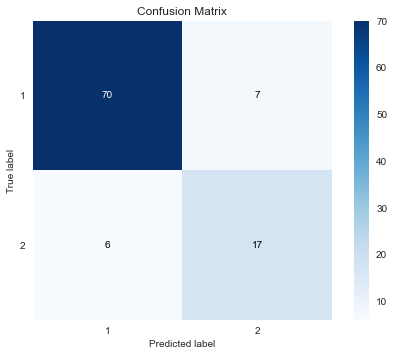

In [82]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_test, y_pred)

## 9.6.3 ROC Curves

In [83]:
svm4 = SVC(kernel='rbf', gamma=2, C=1, probability=True)
svm4.fit(X_train, y_train)

SVC(C=1, gamma=2, probability=True)

In [84]:
svm5 = SVC(kernel='rbf', gamma=50, C=1, probability=True)
svm5.fit(X_train, y_train)

SVC(C=1, gamma=50, probability=True)

In [85]:
y_probas4 = svm4.predict_proba(X_train)
y_probas5 = svm5.predict_proba(X_train)

/Users/kimchaehyeong/.pyenv/versions/anaconda3-5.3.0/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)
/Users/kimchaehyeong/.pyenv/versions/anaconda3-5.3.0/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


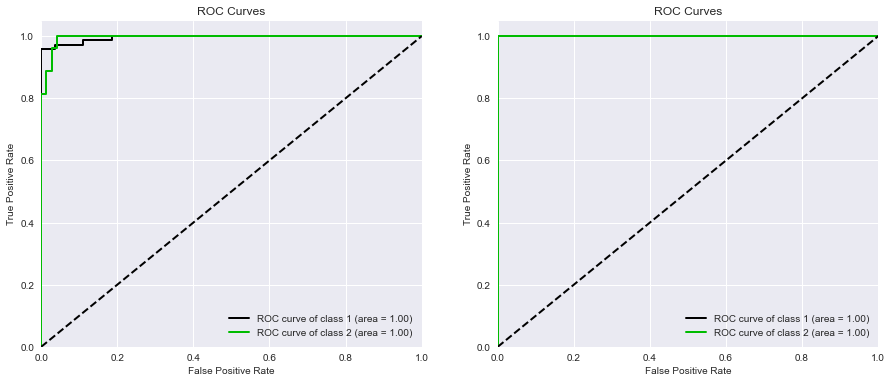

In [87]:
fig, ax = plt.subplots(1, 2, figsize=(15,6), sharex=False, sharey=False)

skplt.metrics.plot_roc_curve(y_train, y_probas4, curves=['each_class'], ax=ax[0])
skplt.metrics.plot_roc_curve(y_train, y_probas5, curves=['each_class'], ax=ax[1])

In [88]:
y_probas_test_4 = svm4.predict_proba(X_test)
y_probas_test_5 = svm5.predict_proba(X_test)

/Users/kimchaehyeong/.pyenv/versions/anaconda3-5.3.0/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)
/Users/kimchaehyeong/.pyenv/versions/anaconda3-5.3.0/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


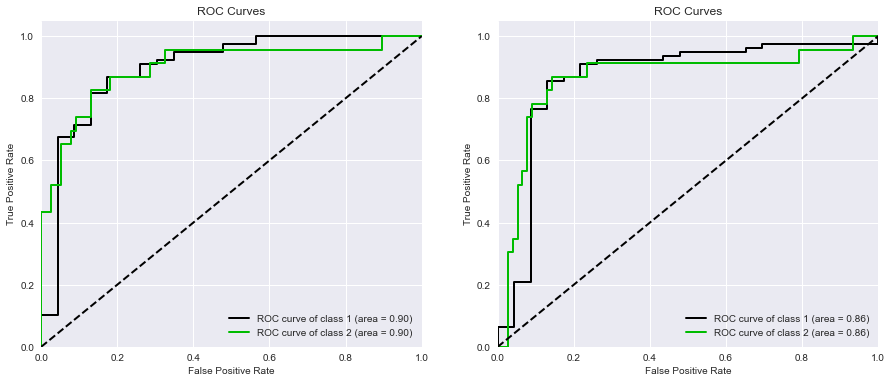

In [90]:
fig, ax = plt.subplots(1, 2, figsize=(15,6), sharex=False, sharey=False)

skplt.metrics.plot_roc_curve(y_test, y_probas_test_4, curves=['each_class'], ax=ax[0])
skplt.metrics.plot_roc_curve(y_test, y_probas_test_5, curves=['each_class'], ax=ax[1])

## 9.6.4 SVM with Multiple Classes

**데이터 준비하기**

In [92]:
np.random.seed(42)

X = np.random.normal(size=400).reshape(200,2)
X[0:100, :] += 2
X[100:150, :] -= 2
y = np.concatenate((np.full(150, 1, dtype=np.int64), np.full(50, 2, dtype=np.int64)))

In [93]:
X = np.concatenate((X, np.random.normal(size=100).reshape(50,2)))
y = np.concatenate((y, np.full(50, 0, dtype=np.int64)))

In [94]:
X[y==0, 1] += 2

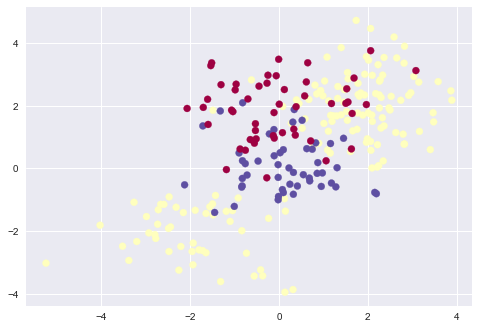

In [95]:
plt.scatter(X[:, 0], X[:,1], c=y+1, cmap='Spectral')

In [96]:
svm_m = SVC(kernel='rbf', C=10, gamma=1)
svm_m.fit(X, y)

SVC(C=10, gamma=1)

/Users/kimchaehyeong/.pyenv/versions/anaconda3-5.3.0/lib/python3.7/site-packages/mlxtend/plotting/decision_regions.py:318: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  **scatter_highlight_kwargs)


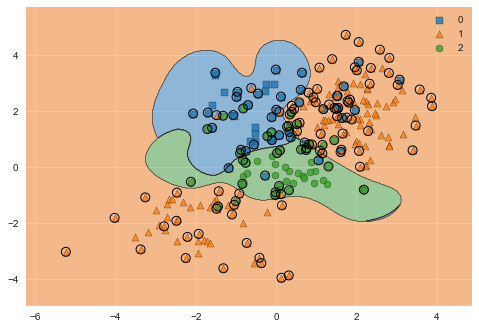

In [98]:
plot_decision_regions(X, y, clf=svm_m, X_highlight=svm_m.support_vectors_)

## 9.6.5 Application to Gene Expression Data

In [ ]:
# 데이터 불러오기
khan_X_train = pd.read_csv('../datasets/Khan_xtrain.csv', index_col=0)
khan_y_train = pd.read_csv('../datasets/Khan_ytrain.csv', index_col=0)
khan_X_test = pd.read_csv('../datasets/Khan_xtest.csv', index_col=0)
khan_y_test = pd.read_csv('../datasets/Khan_ytest.csv', index_col=0)

In [20]:
print(X)
print(3-y)

[[ 0.49671415 -0.1382643 ]
 [ 0.64768854  1.52302986]
 [-0.23415337 -0.23413696]
 [ 1.57921282  0.76743473]
 [-0.46947439  0.54256004]
 [-0.46341769 -0.46572975]
 [ 0.24196227 -1.91328024]
 [-1.72491783 -0.56228753]
 [-1.01283112  0.31424733]
 [-0.90802408 -1.4123037 ]
 [ 2.46564877  0.7742237 ]
 [ 1.0675282  -0.42474819]
 [ 0.45561728  1.11092259]
 [-0.15099358  1.37569802]
 [ 0.39936131  0.70830625]
 [ 0.39829339  2.85227818]
 [ 0.98650278 -0.05771093]
 [ 1.82254491 -0.22084365]
 [ 1.2088636  -0.95967012]
 [-0.32818605  1.19686124]]
[4 4 4 4 4 4 4 4 4 4 2 2 2 2 2 2 2 2 2 2]


In [18]:
X

array([[ 0.49671415, -0.1382643 ],
       [ 0.64768854,  1.52302986],
       [-0.23415337, -0.23413696],
       [ 1.57921282,  0.76743473],
       [-0.46947439,  0.54256004],
       [-0.46341769, -0.46572975],
       [ 0.24196227, -1.91328024],
       [-1.72491783, -0.56228753],
       [-1.01283112,  0.31424733],
       [-0.90802408, -1.4123037 ],
       [ 2.46564877,  0.7742237 ],
       [ 1.0675282 , -0.42474819],
       [ 0.45561728,  1.11092259],
       [-0.15099358,  1.37569802],
       [ 0.39936131,  0.70830625],
       [ 0.39829339,  2.85227818],
       [ 0.98650278, -0.05771093],
       [ 1.82254491, -0.22084365],
       [ 1.2088636 , -0.95967012],
       [-0.32818605,  1.19686124]])